<a href="https://colab.research.google.com/github/biteforceee/probability-theory-and-mathematical-statistics/blob/main/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЛИНЕЙНАЯ РЕГРЕССИЯ
1. Одномерная линейная регрессия
1) Ввести коэффициенты линейного уравнения y(x) = ax+b. Получить выборку
y1, y2, . . . , yn значений случайных величин ξ1, ξ2, . . . , ξn с распределениями
ξi ∼ N(y(i), σ2
).
2) Оценить коэффициенты a и b линейной регрессии yˆ = a
∗x + b
∗ по данным
X = (1, 2, . . . , n), Y = (y1, y2, . . . , yn).
3) Вычислить коэффициент детерминации R2
.
4) Получить дополнительную выборку значений случайных величин ξn+1, ξn+2,
. . . , ξn+m с распределениями ξi ∼ N(y(i), σ2
). Сравнить предсказанные значения yˆ = a
∗x + b
∗
с выборкой.
5) Повторить пункты 1-4 для выборки, где x выбирается случайным образом на
отрезке [t1, t2].
2. Многомерная линейная регрессия
1) Ввести коэффициенты линейного уравнения y(x1, x2) = a1x1 + a2x2 + b. Получить выборку y1, y2, . . . , yn значений случайных величин ξ1, ξ2, . . . , ξn с
распределениями ξi ∼ N(y(x1, x2), σ2
), где x1 ∼ R(t1, t2), x2 ∼ R(s1, s2).
2) Оценить коэффициенты a1, a2 и b линейной регрессии yˆ = a
∗
1x1 + a
∗
2x2 + b
∗
.
3) Вычислить коэффициент детерминации R2
.
4) Получить дополнительную выборку значений случайных величин ξn+1, ξn+2,
. . . , ξn+m с распределениями ξi ∼ N(y(x1, x2), σ2
). Сравнить предсказанные
значения yˆ = a
∗
1x1 + a
∗
2x2 + b
∗
с выборкой.
3. Анализ реальных данных
Найти реальные данные и провести регрессионный анализ.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

In [2]:
def f2(x):
  return 16*np.sin(0.25*x)
def f3(x):
  return x**2
def f4(x):
  return 5*x+4
def generate_data(n, a1, a2, b, sigma, t1, t2, s1, s2):
    x1 = np.random.uniform(t1, t2, n)
    x2 = np.random.uniform(s1, s2, n)
    #x2 = f3(x1)
    y = a1 * x1 + a2 * x2 + b + np.random.normal(0, sigma, n)
    return x1, x2, y


def get_best_coefs_3d(x1, x2, y):
    X = np.column_stack((x1, x2, np.ones_like(x1)))
    # Решаем уравнение нормальной системы: (X^T X) a = X^T y
    coefs = np.linalg.inv(X.T @ X) @ (X.T @ y)
    a1, a2, b = coefs
    return a1, a2, b


def predict(x1, x2, a1, a2, b):
    return a1 * x1 + a2 * x2 + b


def get_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res / ss_tot

Оценённые коэффициенты: a1 = 2.062, a2 = 1.499, b = -7.373
R^2 : 0.064
R^2 на обучающей выборке: 0.059
R^2 на тестовой выборке: -0.031


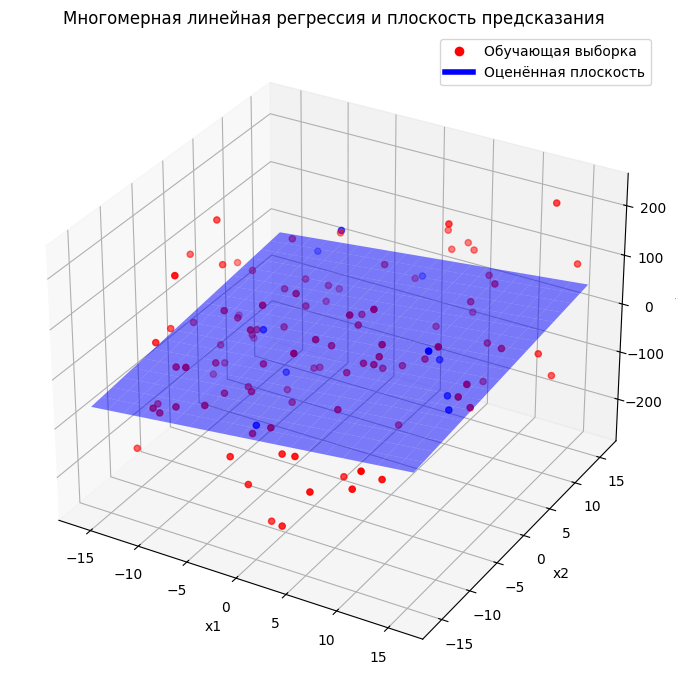

In [5]:
# === Параметры исходной модели ===
a1_true = 2
a2_true, b_true = 2, 5
sigma = 100

t1, t2 = -16, 16  # диапазон для x1
s1, s2 = -16, 16  # диапазон для x2

n_train = 100
x1_train, x2_train, y_train = generate_data(n_train, a1_true, a2_true, b_true, sigma, t1, t2, s1, s2)

a1_hat, a2_hat, b_hat = get_best_coefs_3d(x1_train, x2_train, y_train)

y_pred_train = predict(x1_train, x2_train, a1_hat, a2_hat, b_hat)
r2_train = get_r2(y_train, y_pred_train)
qwe = 1 - (sigma**2)/((sigma**2+(a1_true**2*(t2-t1)**2)/12 + (a2_true**2*(s2-s1)**2)/12))
print(f"Оценённые коэффициенты: a1 = {a1_hat:.3f}, a2 = {a2_hat:.3f}, b = {b_hat:.3f}")
print(f"R^2 : {qwe:.3f}")
print(f"R^2 на обучающей выборке: {r2_train:.3f}")

n_test = 10
x1_test, x2_test, y_test = generate_data(n_test, a1_true, a2_true, b_true, sigma, t1, t2, s1, s2)
y_pred_test = predict(x1_test, x2_test, a1_hat, a2_hat, b_hat)
r2_test = get_r2(y_test, y_pred_test)

print(f"R^2 на тестовой выборке: {r2_test:.3f}")


x1_grid, x2_grid = np.meshgrid(np.linspace(t1, t2, 20), np.linspace(s1, s2, 20))
y_grid = a1_hat * x1_grid + a2_hat * x2_grid + b_hat


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x1_train, x2_train, y_train, color='r')
ax.scatter(x1_test, x2_test, y_test, color='b')
surface = ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5, color='blue')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Многомерная линейная регрессия и плоскость предсказания')


custom_lines = [Line2D([0], [0], marker='o', color='w', label='Обучающая выборка',
                       markerfacecolor='r', markersize=8),
                Line2D([0], [0], color='blue', lw=4, label='Оценённая плоскость')]
ax.legend(handles=custom_lines)

plt.tight_layout()
plt.show()

In [ ]:
def get_best_coefs(x, y):
  n = x.size
  s_x, s_y, s_xy, s_x2 = 0,0,0,0
  for i in range(n):
    s_x += x[i]
    s_y += y[i]
    s_xy += x[i] * y[i]
    s_x2 += x[i] ** 2
  a = (s_xy - s_x * s_y / n) / (s_x2 - s_x**2 / n)
  b = (s_xy - s_x2 * s_y / s_x) / (s_x - n * s_x2 / s_x)
  return a, b

def get_y_mean(y):
  n = y.size
  y_mean = 0
  for i in range(n):
    y_mean += y[i]
  return y_mean / n

def get_y_best(x, a_best, b_best):
  y_best = []
  for i in range(x.size):
    y_best.append(a_best * x[i] + b_best)
  return y_best

def get_r2(y, y_best, y_mean):
  n = y.size
  s1 = 0.
  s2 = 0.
  for i in range(n):
    s1 += (y[i] - y_best[i])**2
    s2 += (y[i] - y_mean)**2
  return 1-(s1/s2)

a 2.0613432552387003
b 0.17553016076157968
r2 0.9951460862211334
new r2 0.9938390212777035


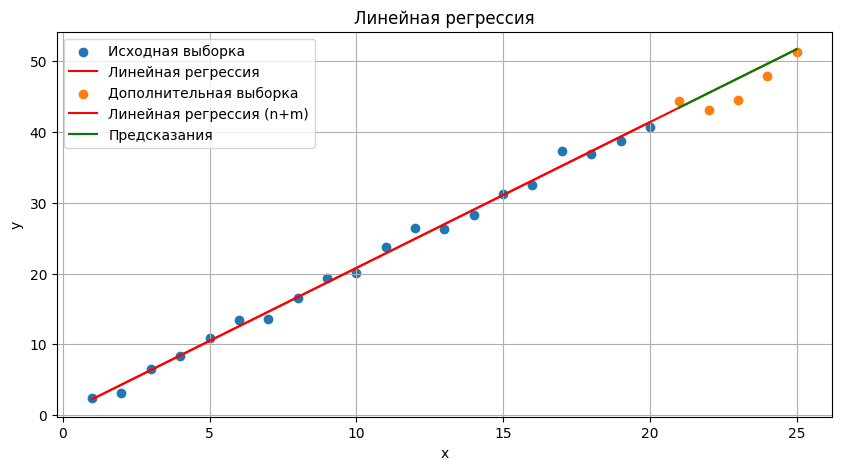

In [ ]:
a = 2  # Коэффициент a
b = 1  # Коэффициент b
n = 20  # Размер первой выборки
sigma = 1  # Стандартное отклонение шума

X = np.arange(1, n + 1)
y = a * X + b
Y = np.random.normal(y, sigma)

a_best, b_best = get_best_coefs(X,Y)
print('a ' + str(a_best))
print('b '+str(b_best))

###
y_best = get_y_best(X, a_best, b_best)
y_mean = get_y_mean(Y)
#print(y_mean)
r2 = get_r2(Y, y_best, y_mean)
print('r2 '+ str(r2))
###

y_pred = a_best * X + b_best
# Визуализация
plt.figure(figsize=(10, 5))

# Первая выборка
plt.scatter(X, Y, label="Исходная выборка")
plt.plot(X, y_pred, color="red", label="Линейная регрессия")
'''print('a ' + str(a_best))
print('b '+str(b_best))
y_best = get_y_best(X, a_best, b_best)
y_mean = get_y_mean(Y)
r2 = get_r2(Y, y_best, y_mean)
print('r2 '+ str(r2))'''


# 4. Получить дополнительную выборку и сравнить предсказания
#n =10
m = 5  # Размер дополнительной выборки
X_new = np.arange(n + 1, n + m + 1)
y_new = a * X_new + b
Y_new = np.random.normal(y_new, sigma)

#a_best, b_best = get_best_coefs(X_new,Y_new)

y_pred_new = a_best * X_new + b_best
# Дополнительная выборка
plt.scatter(X_new, Y_new, label="Дополнительная выборка")

X_combined = np.concatenate([X, X_new])
Y_combined = np.concatenate([Y, Y_new])

y_pred_combined = a_best * X_combined + b_best

plt.plot(X_combined, y_pred_combined, color="red", label="Линейная регрессия (n+m)")

plt.plot(X_new, y_pred_new, color="green", label="Предсказания")

y_best = get_y_best(X_combined, a_best, b_best)
y_mean = get_y_mean(Y_combined)
r2 = get_r2(Y_combined, y_best, y_mean)
print('new r2 '+ str(r2))
# Дополнительная выборка
#plt.scatter(X_new, Y_new, label="Дополнительная выборка")
#plt.plot(X_new, y_pred_new, color="green", label="Предсказания")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Линейная регрессия")
plt.legend()
plt.grid(True)
plt.show()

2.3724759950978522
-3.6146780924617836


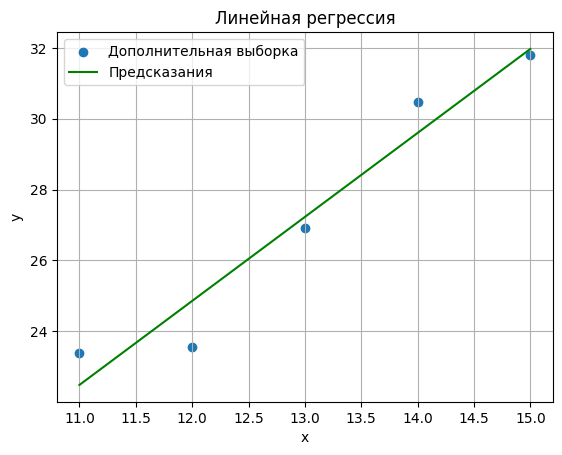

In [ ]:
# 4. Получить дополнительную выборку и сравнить предсказания
m = 5  # Размер дополнительной выборки
X_new = np.arange(n + 1, n + m + 1)
y_new = a * X_new + b
Y_new = np.random.normal(y_new, sigma)

a_best, b_best = get_best_coefs(X_new,Y_new)
print('a ' + str(a_best))
print('b '+str(b_best))

y_pred_new = a_best * X_new + b_best

r2 = get_r2(Y_new, y_best, y_mean)
print('r2 '+ str(r2))
# Дополнительная выборка
plt.scatter(X_new, Y_new, label="Дополнительная выборка")
plt.plot(X_new, y_pred_new, color="green", label="Предсказания")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Линейная регрессия")
plt.legend()
plt.grid(True)
plt.show()

a 2.002906267664903
b 0.9275845555204115
r2 0.9706419708893916


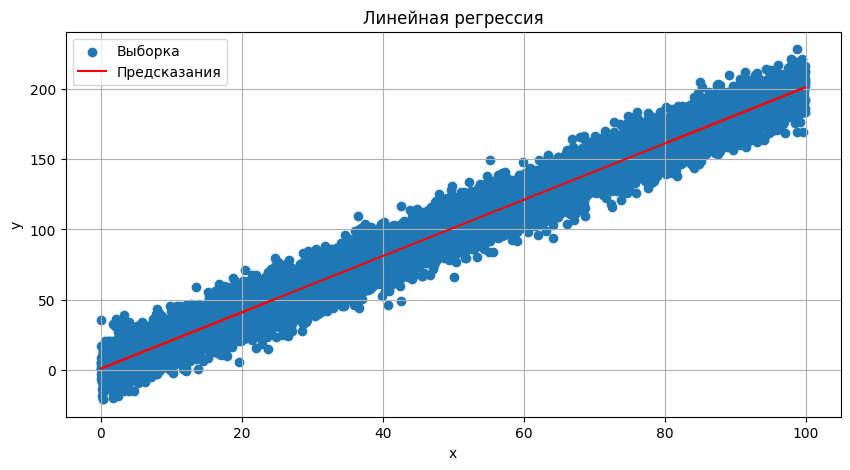

In [ ]:
# 5. Повторить с случайным x
a = 2  # Коэффициент a
b = 1  # Коэффициент b
n = 10000
t1 = 0
t2 = 100
sigma= 10
X_random = np.random.uniform(t1, t2, n)
y_random = a * X_random + b
Y_random = np.random.normal(y_random, sigma)

a_best, b_best = get_best_coefs(X_random,Y_random)
print('a ' + str(a_best))
print('b '+str(b_best))
y_best = get_y_best(X_random, a_best, b_best)
y_mean = get_y_mean(Y_random)
r2 = get_r2(Y_random, y_best, y_mean)
print('r2 '+ str(r2))

y_random_new = a_best * X_random + b_best
# Визуализация
plt.figure(figsize=(10, 5))

plt.scatter(X_random, Y_random, label="Выборка")
plt.plot(X_random, y_random_new, color="red", label="Предсказания")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Линейная регрессия")
plt.legend()
plt.grid(True)
plt.show()

Набор данных о цветке ириса или набор данных об ирисе Фишера представляет собой многомерный набор данных, представленный британским статистиком, евгеником и биологом Рональдом Фишером в его статье 1936 года «Использование множественных измерений в таксономических задачах в качестве примера линейного дискриминантного анализа».

Набор данных состоит из 50 образцов каждого из трех видов ириса (Iris setosa, Iris virginica и Iris versicolor). У каждого образца измеряли четыре характеристики: длину и ширину чашелистиков и лепестков в сантиметрах. На основе комбинации этих четырех признаков Фишер разработал линейную дискриминантную модель, позволяющую отличать виды друг от друга.

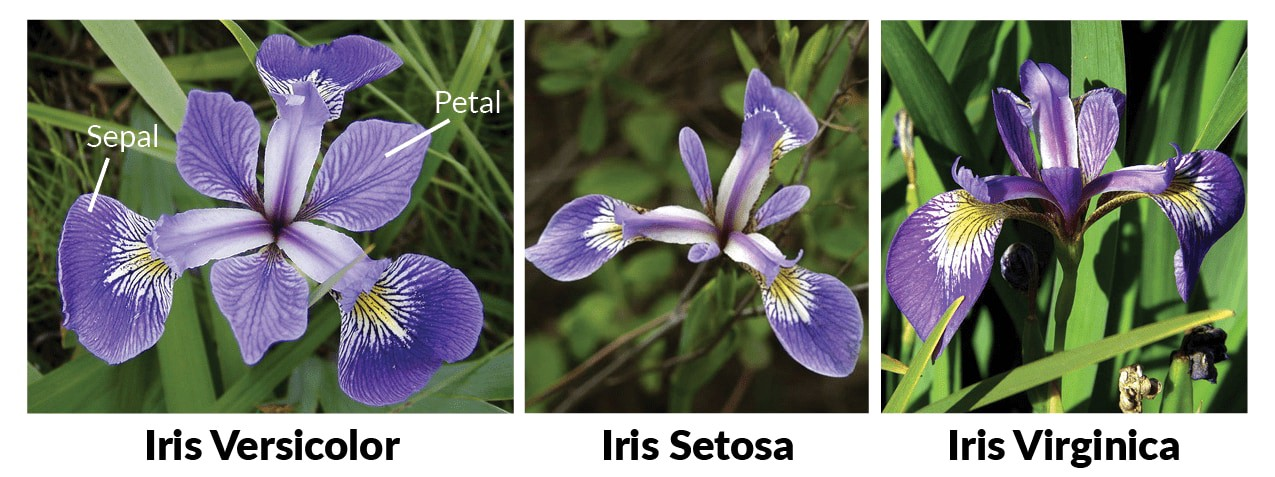

Скачать датасет: https://drive.google.com/file/d/1s7OL8q6xiyRwjhrsVKOHxPUVaz5pJnNN/view?usp=share_link

1. Выведите информацию о датафрейме, есть ли в датафрейме пропущенные значения?
2. Используя методы из прошлых занятий, решите проблему с пропущенными значениями.
3. Какой столбец является целевым? Узнайте количество уникальных значений в нем. Замените уникальные значения цифрами, для дальнейшего использования в моделях машинного обучения.
4. Постройте матрицу корреляции, есть ли в датасете столбцы, которые связаны между собой?

5. Разделите датасет на выборку x - фичами и y - целевой колонкой датафрейма
6. Разделите x и y на тренеровочную и тестовою выборку, тестовая выборка должна составлять 20%
7. Обучите 3 алгорима из прошлого занятия, с параметрами по умолчанию и посчитайте метрику Accuracy, какой алгоритм показал наилучший результат?


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [ ]:
def draw_corr_matrix(df: pd.DataFrame, shape: int): # df-ваш датафрейм, shape - размер матрицы
    df = df.corr().copy()
    plt.rcParams["figure.figsize"] = shape,shape
    plt.imshow(df, cmap ='viridis')


    plt.colorbar()

    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            text = plt.text(j, i, round(float(df.iloc[i, j]),2),
                        ha="center", va="center", color="r")

    plt.xticks(range(len(df)), df.columns, rotation = 45)


    plt.yticks(range(len(df)), df.index)

    plt.show()

In [ ]:
data = pd.read_csv('/content/Iris_dataset.csv')

In [ ]:
data

In [ ]:
data.info()

In [ ]:
#data.dropna(inplace=True)
data.sepal_width.replace(np.NaN, data.sepal_width.mean(), inplace = True)

In [ ]:
data.sepal_length.replace(np.NaN, data.sepal_length  .mean(), inplace = True)

In [ ]:
data.petal_length.replace(np.NaN, data.petal_length.mean(), inplace = True)

In [ ]:
data.petal_width.replace(np.NaN, data.petal_width.mean(), inplace = True)

In [ ]:
data

In [ ]:
data.species.value_counts()

In [ ]:
data.species.replace('Iris-versicolor', 0, inplace=True)
data.species.replace('Iris-virginica', 1, inplace=True)
data.species.replace('Iris-setosa', 2, inplace=True)

In [ ]:
data = data.sample(frac=1, random_state=10).reset_index(drop=True)

In [ ]:
draw_corr_matrix(data, 7)

In [ ]:
x = data.drop(columns=['species'])

In [ ]:
y = data['species']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

Логистическая регрессия

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
lr = LogisticRegression(random_state=10)

In [ ]:
lr.fit(x_train, y_train)

In [ ]:
y_test_predictions_lr=lr.predict(x_test)

In [ ]:
y_test_predictions_lr

In [ ]:
metrics.accuracy_score(y_test, y_test_predictions_lr)*100

Поиск строки в последовательности
Задание.
a) Получить случайную последовательность заданной длины N >> 1.
б) Ввести короткую строку для поиска. Найти число вхождений данной строки в
исходную последовательность.
в) Построить ряд распределения для числа вхождений, найти выборочное среднее
и выборочную дисперсию.
Случайная последовательность из игры «камень, ножницы, бумага»

In [ ]:
def count_substring_occurrences(string, substring):
    count = 0
    for i in range(len(string) - len(substring) + 1):
        if string[i:i + len(substring)] == substring:
            count += 1
    return count

In [ ]:
'''
3 разных 10000
Выборочное среднее (x): 370.284
Выборочная дисперсия (S^2): 287.18534400000004

5 разных 10000
Выборочное среднее (x): 41.238
Выборочная дисперсия (S^2): 40.30335599999995

3 одинаковых
Выборочное среднее (x): 370.127
Выборочная дисперсия (S^2): 604.0968709999999

5 одинаковых
Выборочное среднее (x): 41.26
Выборочная дисперсия (S^2): 77.58240000000009

'''

In [ ]:
import random
import math
import pandas as pd
from scipy import integrate
from collections import Counter

## задание 3 ##
## 6 вариант ##

words = {1: 'камень', 2: 'ножницы', 3: 'бумага'}

N = int(input("введите количество слов в строке: "))
poisk = input("введите строку для поиска: ")


num_experiments = 1000  # Количество экспериментов

distribution = Counter()  # Для хранения распределения

occurrences_list = []  # To store all occurrences for calculations

for _ in range(num_experiments):
    stroka = ""
    for _ in range(N):
        a = random.randint(1, 3)
        stroka += words[a] + " "

    occurrences = count_substring_occurrences(stroka, poisk)
    distribution[occurrences] += 1
    occurrences_list.append(occurrences)  # Store occurrences

sorted_distribution = sorted(distribution.items(), key=lambda item: item[0])
pd = pd.DataFrame(sorted_distribution, columns=['число вхождений', 'частота'])
pd['частота'] = pd['частота'] / num_experiments

# Calculate sample mean (x)
sample_mean = sum(occurrences_list) / len(occurrences_list)

# Calculate sample variance (S^2)
sample_variance = sum([(x - sample_mean)**2 for x in occurrences_list]) / len(occurrences_list)

print("\nВыборочное среднее (x):", sample_mean)
print("Выборочная дисперсия (S^2):", sample_variance)

#covariance = sum([(occurrences_list[i] - mean_occurrences) * (random_variable_list[i] - mean_random_variable)
                 # for i in range(len(occurrences_list))]) / len(occurrences_list)

#print("Covariance:", covariance)

введите количество слов в строке: 10000
введите строку для поиска: камень ножницы бумага

Выборочное среднее (x): 371.14
Выборочная дисперсия (S^2): 308.15840000000003


In [ ]:
pd.T

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
число вхождений,308.000,315.000,320.000,321.000,322.000,324.000,326.000,327.000,329.000,330.000,...,410.000,412.000,414.000,415.000,416.000,417.000,419.000,420.000,421.000,423.000
частота,0.001,0.001,0.002,0.001,0.001,0.001,0.001,0.002,0.001,0.001,...,0.002,0.001,0.001,0.002,0.001,0.002,0.001,0.001,0.001,0.001


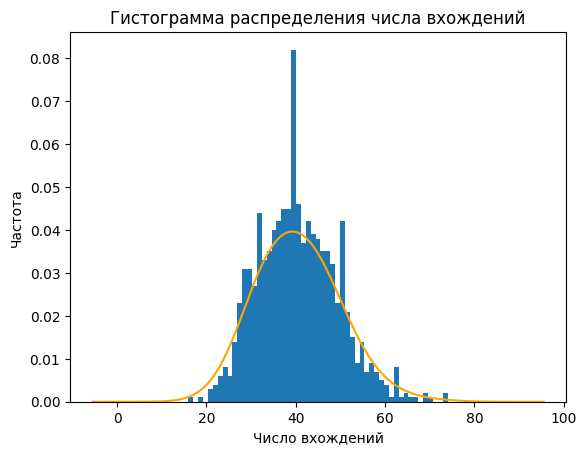

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

'''
4 одинаковых 10000
Выборочное среднее (x): 123.076
Выборочная дисперсия (S^2): 236.7202239999995


5 одинаковых 10000
Выборочное среднее (x): 40.485
Выборочная дисперсия (S^2): 78.32777499999995
показано для 5
'''

plt.hist(pd['число вхождений'], weights=pd['частота'], bins=pd['число вхождений'].nunique())
sns.kdeplot(x=pd['число вхождений'], weights=pd['частота'], color = 'orange')

plt.xlabel('Число вхождений')
plt.ylabel('Частота')
plt.title('Гистограмма распределения числа вхождений')

plt.show()

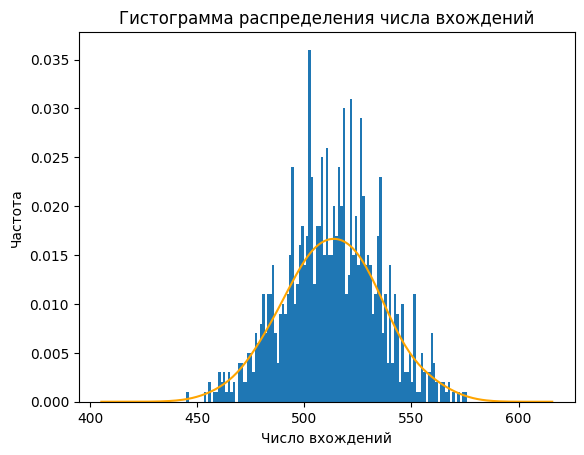

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

'''
3 одинаковых 20000
Выборочное среднее (x): 513.015
Выборочная дисперсия (S^2): 475.4987750000006
'''

plt.hist(pd['число вхождений'], weights=pd['частота'], bins=pd['число вхождений'].nunique())
sns.kdeplot(x=pd['число вхождений'], weights=pd['частота'], color = 'orange')

plt.xlabel('Число вхождений')
plt.ylabel('Частота')
plt.title('Гистограмма распределения числа вхождений')

plt.show()

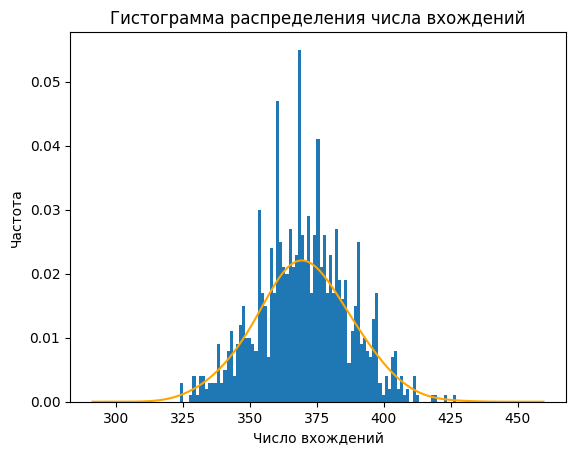

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

'''
3 разных 10000
Выборочное среднее (x): 370.224
Выборочная дисперсия (S^2): 284.29182399999934
'''

plt.hist(pd['число вхождений'], weights=pd['частота'], bins=pd['число вхождений'].nunique())
sns.kdeplot(x=pd['число вхождений'], weights=pd['частота'], color = 'orange')

plt.xlabel('Число вхождений')
plt.ylabel('Частота')
plt.title('Гистограмма распределения числа вхождений')

plt.show()

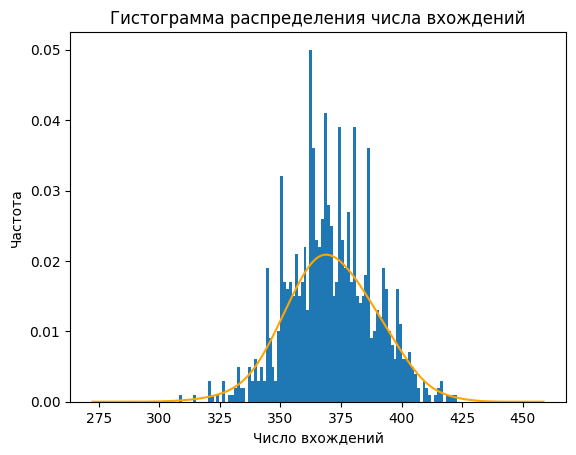

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
'''
введите количество слов в строке: 20000
введите строку для поиска: бумага бумага бумага

Выборочное среднее (x): 740.143
Выборочная дисперсия (S^2): 1234.1565509999996
'''
plt.hist(pd['число вхождений'], weights=pd['частота'], bins=pd['число вхождений'].nunique())
sns.kdeplot(x=pd['число вхождений'], weights=pd['частота'], color = 'orange')

plt.xlabel('Число вхождений')
plt.ylabel('Частота')
plt.title('Гистограмма распределения числа вхождений')

plt.show()

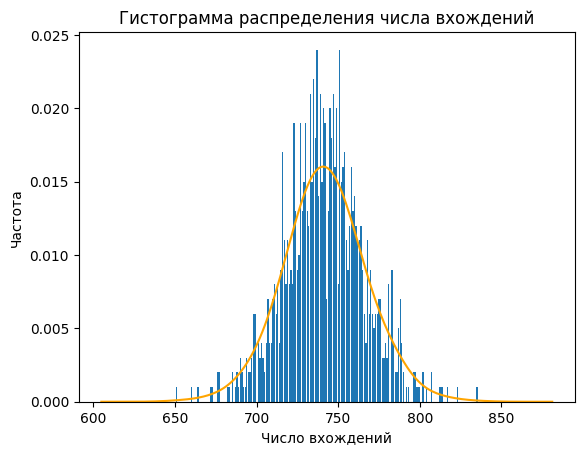

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
'''
введите количество слов в строке: 20000
введите строку для поиска: ножницы бумага камень

Выборочное среднее (x): 741.775
Выборочная дисперсия (S^2): 591.846375

'''
plt.bar(pd['число вхождений'], pd['частота'])
sns.kdeplot(x=pd['число вхождений'], weights=pd['частота'], color = 'orange')

plt.xlabel('Число вхождений')
plt.ylabel('Частота')
plt.title('Гистограмма распределения числа вхождений')

plt.show()

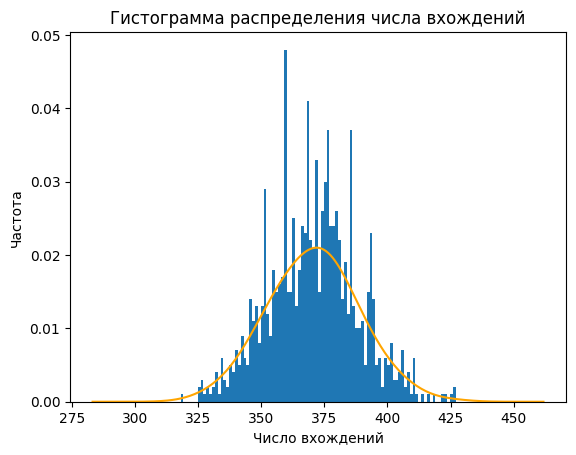

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
'''
3 одинаковых 10000
введите строку для поиска: ножницы бумага камень

Выборочное среднее (x): 370.647
Выборочная дисперсия (S^2): 307.08839099999994

'''
plt.hist(pd['число вхождений'], weights=pd['частота'], bins=pd['число вхождений'].nunique())
sns.kdeplot(x=pd['число вхождений'], weights=pd['частота'], color = 'orange')

plt.xlabel('Число вхождений')
plt.ylabel('Частота')
plt.title('Гистограмма распределения числа вхождений')

plt.show()

In [ ]:
import matplotlib.pyplot as plt





plt.hist(pd['число вхождений'], weights=pd['частота'], bins=pd['число вхождений'].nunique())


plt.xlabel('Число вхождений')
plt.ylabel('Частота')
plt.title('Гистограмма распределения числа вхождений')


plt.show()

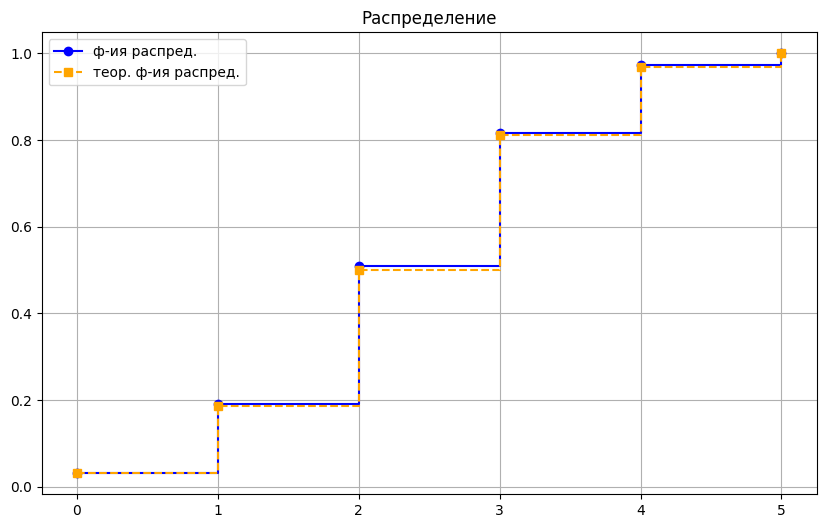

Максимальная разность между: 0.0086
За 100 было принято 37 отклонено 63
За 100 было принято 39 отклонено 61
За 100 было принято 41 отклонено 59
За 100 было принято 31 отклонено 69
За 100 было принято 36 отклонено 64
За 100 было принято 35 отклонено 65
За 100 было принято 37 отклонено 63
За 100 было принято 29 отклонено 71
За 100 было принято 30 отклонено 70


За 100 было принято 21 отклонено 79
За 100 было принято 16 отклонено 84
За 100 было принято 18 отклонено 82
За 100 было принято 17 отклонено 83
За 100 было принято 13 отклонено 87
За 100 было принято 9 отклонено 91
За 100 было принято 23 отклонено 77
За 100 было принято 20 отклонено 80
За 100 было принято 8 отклонено 92


За 100 было принято 82 отклонено 18
За 100 было принято 87 отклонено 13
За 100 было принято 78 отклонено 22
За 100 было принято 87 отклонено 13
За 100 было принято 82 отклонено 18
За 100 было принято 80 отклонено 20
За 100 было принято 84 отклонено 16
За 100 было принято 88 отклонено 12
За 100 было принято 85 отк

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom

rez = random.random()

def generate_table(M, N, p):
    failures_counts = np.zeros(M + 1)

    for _ in range(N):
        failures = np.sum(np.random.rand(M) < p)
        failures_counts[failures] += 1

    empirical_probs = failures_counts / N
    theoretical_probs = binom.cdf(range(M + 1), M, p)
    empirical_cdf = np.cumsum(empirical_probs)

    max_diff = np.max(np.abs(empirical_cdf - theoretical_probs))

    x = np.arange(0, M + 1)

    df = pd.DataFrame({
        "случайная величина": x,
        "количество": failures_counts,
        "частота": empirical_probs,
        "теоретическая вероятность": binom.pmf(x, M, p),
        "ф-ия распределения": empirical_cdf,
        "теор. фи-я распределения": theoretical_probs
    })

    plt.figure(figsize=(10, 6))
    plt.step(x, empirical_cdf, label='ф-ия распред.', where="post", marker='o', color='blue')
    plt.step(x, theoretical_probs, label='теор. ф-ия распред.', where="post", marker='s', linestyle='--', color='orange')
    plt.title("Распределение")
    plt.legend()
    plt.grid()
    plt.show()

    print(f"Максимальная разность между: {max_diff:.4f}")
    return df

M = 5  # Количество испытаний
N = 10000  # Количество экспериментов
p = 0.5  # Вероятность отказа в одном испытании
df = generate_table(M, N, p)
df.T
def statistics(df, N):
  v = df["частота"]
  n = df['количество']
  summ = 0
  for i in range(M + 1):
      summ += i* n[i]
  middle = summ / np.double(N) #выборочное среднее
  disp_sum = 0.0
  for i in range(M + 1):
      disp_sum += (i - middle)**2 * n[i]
  S = disp_sum / N #выборочная дисперсия
  R = df.T.index.size - 1#размах
  median = 0.0
  medd2 = []
  for i in range(M + 1):
      if n[i] != 0:
          for j in range(int(n[i])):
              medd2.append(i)
  if len(medd2) % 2 != 0:
    k = len(medd2)
    median = medd2[(k-1) / 2]
  else:
    k = len(medd2)
    median = (medd2[(k-1) // 2] + medd2[k // 2]) / 2.0

  ver = df['теоретическая вероятность']
  matOj =0.0
  for i in range(M + 1):
      matOj += ver[i] * i

  disp = 0.0
  mat =0.0
  for i in range(M + 1):
      mat += ver[i] * i**2
  disp = mat - matOj**2
  data = pd.DataFrame({
      'Mq': [matOj.round(2)],
      'x':[middle.round(2)],
      '|Mq - x|':[abs(matOj - middle).round(2)],
      'Dq':[disp.round(2)],
      'S^2':[S.round(2)],
      '|Dq - S^2|':[abs(disp - S).round(2)],
      'M̃e':[median],
      'R̃':[R]
  }, index=[0])
  return data
stat = statistics(df, N)
stat
from scipy.special import gamma
from scipy.stats import chi2
import math

def gipoteza(alpha, quan_deltas, right_border,N, df):
    def f_hi_sqr(x, r):
        if x <= 0:
            return 0
        else:
            if r / 2 > 0:
                return (2 ** (-r / 2)) * (math.gamma(r / 2) ** (-1)) * x ** (r / 2 - 1) * math.e ** (-x / 2)
            else:
                return 0
    def F_R0(R0, quan_deltas):
        sum_a = 0
        n = 10000
        for i in range(1, n):
            sum_a += (f_hi_sqr(R0 * (i - 1) / n, quan_deltas - 1) + f_hi_sqr(R0 * i / n, quan_deltas - 1)) * (R0 / (2 * n))
        return sum_a
    H0_accepted = 0
    H0_rejected = 0
    F0_teor = df['теор. фи-я распределения']
    F_experiments = df['количество']

    # Using chi2.ppf to get critical value:
    critical_value = chi2.ppf(1 - alpha, quan_deltas - 1)

    for _ in range(1, right_border + 1):
        z = random.sample(range(df.T.index.size), quan_deltas - 1)
        z.sort()
        q = [0] * quan_deltas
        nj = [0] * quan_deltas
        q[0] = F0_teor[z[0]]
        nj[0] = F_experiments[z[0]]

        for i in range(1, quan_deltas - 1):
            q[i] = F0_teor[z[i]] - F0_teor[z[i - 1]]
            nj[i] = F_experiments[z[i]] - F_experiments[z[i - 1]]

        q[quan_deltas - 1] = 1 - F0_teor[z[-1]]
        nj[quan_deltas - 1] = N - F_experiments[z[-1]]

        R0 = 0
        for i in range(quan_deltas):
            if q[i] > 0:  # Avoid division by zero
                R0 += ((nj[i] - N * q[i]) ** 2) / (N * q[i])

        # Comparing with critical value:
        if (1-F_R0(R0, quan_deltas)) < alpha:
            H0_accepted += 1
        else:
            H0_rejected += 1

    print("За " + str(right_border) + " было принято " + str(H0_accepted) + " отклонено " + str(H0_rejected))

for i in range(1, 10):
    gipoteza(0.5, 2, 100,N, df)
print('\n')
for i in range(1, 10):
    gipoteza(0.05, 2, 100,N, df)
print('\n')
for i in range(1, 10):
    gipoteza(0.95, 2, 100,N, df)

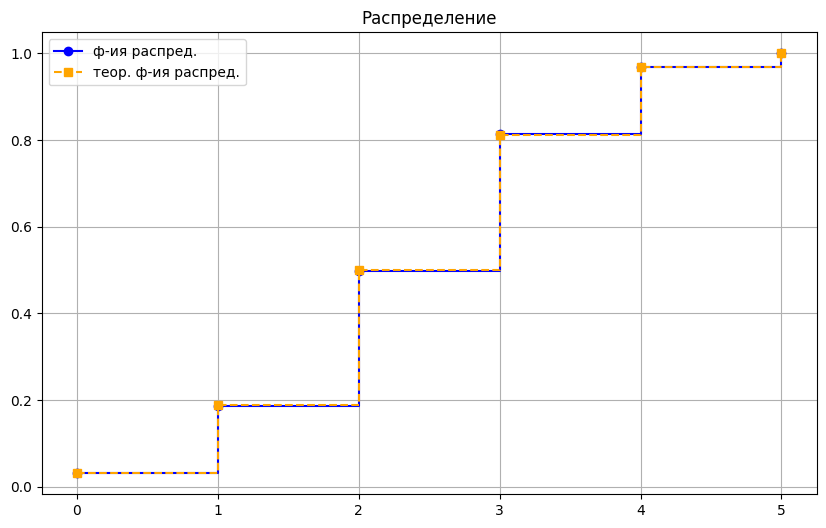

Максимальная разность между: 0.0017


In [ ]:
import random, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom

rez = random.random()

def simulate_failures(M, N, p):
  failure_counts = {}
  for _ in range(N):
    failures = 0
    for _ in range(M):
      if random.random() <= p:
        failures += 1

    failure_counts[failures] = failure_counts.get(failures, 0) + 1

  arr = [0] * (M + 1)
  arr2 = [0.0] * (M + 1)

  for i in range(M + 1):
    if i in failure_counts:
      arr[i] = failure_counts[i]
      arr2[i] = failure_counts[i] / N

  return failure_counts, arr, arr2

def get_probabilities(M, p):
  probabilities = [
      math.comb(M, i) * (p ** i) * ((1 - p) ** (M - i))
      for i in range(M+1)
  ]
  return probabilities

def generate_table(M, N, p):
    failures_counts = np.zeros(M + 1)

    for _ in range(N):
        failures = np.sum(np.random.rand(M) < p)
        failures_counts[failures] += 1

    #empirical_probs = failures_counts / N
    empirical_probs = simulate_failures(M, N, p)[2]
    #theoretical_probs = binom.cdf(range(M + 1), M, p)
    theoretical_probs = get_probabilities(M, p)
    for i in range (1,M+1):
        theoretical_probs[i] += theoretical_probs[i-1]
    empirical_cdf = np.cumsum(empirical_probs)

    max_diff = np.max(np.abs(empirical_cdf - theoretical_probs))

    x = np.arange(0, M + 1)

    df = pd.DataFrame({
        "случайная величина": x,
        "количество": failures_counts,
        "частота": empirical_probs,
        "теоретическая вероятность": binom.pmf(x, M, p),
        "ф-ия распределения": empirical_cdf,
        "теор. фи-я распределения": theoretical_probs
    })

    plt.figure(figsize=(10, 6))
    plt.step(x, empirical_cdf, label='ф-ия распред.', where="post", marker='o', color='blue')
    plt.step(x, theoretical_probs, label='теор. ф-ия распред.', where="post", marker='s', linestyle='--', color='orange')
    #plt.xlabel("Number of Failures")
    #plt.ylabel("Cumulative Probability")
    plt.title("Распределение")
    plt.legend()
    plt.grid()
    plt.show()

    print(f"Максимальная разность между: {max_diff:.4f}")
    return df

M = 5  # Количество испытаний
N = 100000  # Количество экспериментов
p = 0.5  # Вероятность отказа в одном испытании
df = generate_table(M, N, p)


In [ ]:
df.T

,0,1,2,3,4,5
случайная величина,0.00000,1.00000,2.00000,3.00000,4.00000,5.00000
количество,3126.00000,15633.00000,31132.00000,31132.00000,15837.00000,3140.00000
частота,0.03147,0.15867,0.31019,0.31237,0.15606,0.03124
теоретическая вероятность,0.03125,0.15625,0.31250,0.31250,0.15625,0.03125
ф-ия распределения,0.03147,0.19014,0.50033,0.81270,0.96876,1.00000
теор. фи-я распределения,0.03125,0.18750,0.50000,0.81250,0.96875,1.00000


In [ ]:
def expirements(df):
  exp = df['количество'].copy()
  for i in range(1,len(exp)):
    exp[i] += exp[i-1]
  return exp
F_experiments = expirements(df)

In [ ]:
def statistics(df, N):
  v = df["частота"]
  n = df['количество']
  summ = 0
  for i in range(M + 1):
      summ += i* n[i]
  middle = summ / np.double(N) #выборочное среднее
  disp_sum = 0.0
  for i in range(M + 1):
      disp_sum += (i - middle)**2 * n[i]
  S = disp_sum / N #выборочная дисперсия
  R = df.T.index.size - 1#размах
  median = 0.0
  medd2 = []
  for i in range(M + 1):
      if n[i] != 0:
          for j in range(int(n[i])):
              medd2.append(i)
  if len(medd2) % 2 != 0:
    k = len(medd2)
    median = medd2[(k-1) / 2]
  else:
    k = len(medd2)
    median = (medd2[(k-1) // 2] + medd2[k // 2]) / 2.0

  ver = df['теоретическая вероятность']
  matOj =0.0
  for i in range(M + 1):
      matOj += ver[i] * i

  disp = 0.0
  mat =0.0
  for i in range(M + 1):
      mat += ver[i] * i**2
  disp = mat - matOj**2
  data = pd.DataFrame({
      'Mq': [matOj.round(2)],
      'x':[middle.round(2)],
      '|Mq - x|':[abs(matOj - middle).round(2)],
      'Dq':[disp.round(2)],
      'S^2':[S.round(2)],
      '|Dq - S^2|':[abs(disp - S).round(2)],
      'M̃e':[median],
      'R̃':[R]
  }, index=[0])
  return data
stat = statistics(df, N)
stat

,Mq,x,|Mq - x|,Dq,S^2,|Dq - S^2|,M̃e,R̃
0,2.5,2.5,0.0,1.25,1.26,0.01,3.0,5


In [ ]:
from scipy.stats import chi2, geom, binom, norm, uniform
def gip(alph, inte, p, N, M, gr, df):
  def round_up(a):
    if a-int(a)<0.5:
      return int(a)
    else:
      return int(a)+1

  prinyat = 0
  otklonit = 0

  # Ввод уровня значимости
  alpha = alph

  # Ввод интервалов
  #print("\nВведите количество интервалов (k)")
  k = inte

  '''if k > 1:
      for i in range(k - 1):
          #print(f"Введите границу z{i + 1} (целое число): ")
          z.append(random.randint(0,M))
          #z.append(binom(M,p,1))
          #z.append(int(input()))
      z = sorted(list(set(z)))

  # Добавляем "минус бесконечность" и "плюс бесконечность" к границам
  intervals = [-np.inf] + z + [np.inf]'''

  for o in range(gr):
    z = []
    if k > 1:
      for i in range(k - 1):
          #print(f"Введите границу z{i + 1} (целое число): ")
          #z.append(random.randint(0,M))
          z.append(uniform.rvs(loc=0, scale=M))
          #z.append(2)
          #z.append(4)
          #z.append(binom(M,p,1))
          #z.append(int(input()))
      z = sorted(list(set(z)))

    # Добавляем "минус бесконечность" и "плюс бесконечность" к границам
    intervals = [-np.inf] + z + [np.inf]

    # Симуляция экспериментов
    infected_counts = np.random.binomial(M,p, N)

    infected_total = np.sum(infected_counts)

    # Подсчёт частот попадания в интервалы
    interval_counts = np.histogram(infected_counts, bins=intervals)[0]
    interval_frequencies = interval_counts / N

    # Теоретические вероятности
    a_vals = np.arange(0, 1000)
    p_vals = binom.pmf(a_vals,M, p)

    q = []  # Список для теоретических вероятностей q_j
    for j in range(k):
        lower_bound = intervals[j]
        upper_bound = intervals[j + 1]
        q_j = np.sum(p_vals[(a_vals >= lower_bound) & (a_vals < upper_bound)])
        q.append(q_j)

    # Формируем таблицу интервалов
    interval_table = pd.DataFrame({
        'Интервал': [f"({intervals[i]}, {intervals[i + 1]})" for i in range(k)],
        'Частота n(j)': interval_counts,
        'Выбор вер': interval_frequencies,
        'Теор вер q(j)': q,
        'Ожидаемое n*q(j)': [N * q_j for q_j in q]})

    '''print("\nТаблица интервалов:")
    print(interval_table)'''

    # Вычисление статистики R0
    expected_counts = interval_table['Ожидаемое n*q(j)']
    R0 = np.sum((interval_counts - expected_counts) ** 2 / expected_counts)

    # Вычисление значения F отрицание для R0
    k_minus_1 = k - 1  # Степени свободы
    F_bar_R0 = 1 - chi2.cdf(R0, k_minus_1)

    # Пороговое значение F отрицание
    F_bar_critical = alpha

    # решение о гипотезе H0
    hypothesis_decision = "Принимаем гипотезу H0" if F_bar_R0 > F_bar_critical else "Отклоняем гипотезу H0"

    if (hypothesis_decision == "Принимаем гипотезу H0"):
        prinyat += 1

    if (hypothesis_decision == "Отклоняем гипотезу H0"):
        otklonit += 1

    # Вывод результатов
    '''print("\n� езультаты проверки гипотезы:")
    print(f"R0 = {R0:.5f}")
    print(f"отрицание F(R0) = {F_bar_R0:.5f}")
    print(f"Пороговое значение отрицания F = α = {F_bar_critical:.5f}")
    print(f"{hypothesis_decision}")'''

  print("Количество принятий гипотезы:", prinyat)
  print("Количество отклонений гипотезы:", otklonit)

gip(0.5, 2, 0.5, 100,5, 4, df)
gip(0.05, 2, 0.5, 100,5, 4, df)
gip(0.95, 2, 0.5, 100,5, 4, df)

Количество принятий гипотезы: 58
Количество отклонений гипотезы: 42
Количество принятий гипотезы: 97
Количество отклонений гипотезы: 3
Количество принятий гипотезы: 1
Количество отклонений гипотезы: 99


In [ ]:
for i in range(1, 10):
    gip(0.5, 2, 0.5, 100,5, 4, df)
print("3 inter")
for i in range(1, 10):
    gip(0.5, 3, 0.5, 100,5, 4, df)
print("4 inter")
for i in range(1, 10):
    gip(0.5, 4, 0.5, 100,5, 4, df)

Количество принятий гипотезы: 46
Количество отклонений гипотезы: 54
Количество принятий гипотезы: 51
Количество отклонений гипотезы: 49
Количество принятий гипотезы: 47
Количество отклонений гипотезы: 53
Количество принятий гипотезы: 44
Количество отклонений гипотезы: 56
Количество принятий гипотезы: 48
Количество отклонений гипотезы: 52
Количество принятий гипотезы: 47
Количество отклонений гипотезы: 53
Количество принятий гипотезы: 53
Количество отклонений гипотезы: 47
Количество принятий гипотезы: 51
Количество отклонений гипотезы: 49
Количество принятий гипотезы: 55
Количество отклонений гипотезы: 45
3 inter
Количество принятий гипотезы: 59
Количество отклонений гипотезы: 41
Количество принятий гипотезы: 52
Количество отклонений гипотезы: 48
Количество принятий гипотезы: 51
Количество отклонений гипотезы: 49
Количество принятий гипотезы: 52
Количество отклонений гипотезы: 48
Количество принятий гипотезы: 60
Количество отклонений гипотезы: 40
Количество принятий гипотезы: 52
Количес

In [ ]:
for i in range(1, 10):
    gip(0.95, 2, 0.5, 100,5, 4, df)
print("3 inter")
for i in range(1, 10):
    gip(0.95, 3, 0.5, 100,5, 4, df)
print("4 inter")
for i in range(1, 10):
    gip(0.95, 4, 0.5, 100,5, 4, df)

Количество принятий гипотезы: 1
Количество отклонений гипотезы: 99
Количество принятий гипотезы: 3
Количество отклонений гипотезы: 97
Количество принятий гипотезы: 1
Количество отклонений гипотезы: 99
Количество принятий гипотезы: 2
Количество отклонений гипотезы: 98
Количество принятий гипотезы: 1
Количество отклонений гипотезы: 99
Количество принятий гипотезы: 3
Количество отклонений гипотезы: 97
Количество принятий гипотезы: 1
Количество отклонений гипотезы: 99
Количество принятий гипотезы: 0
Количество отклонений гипотезы: 100
Количество принятий гипотезы: 5
Количество отклонений гипотезы: 95
3 inter
Количество принятий гипотезы: 18
Количество отклонений гипотезы: 82
Количество принятий гипотезы: 7
Количество отклонений гипотезы: 93
Количество принятий гипотезы: 19
Количество отклонений гипотезы: 81
Количество принятий гипотезы: 5
Количество отклонений гипотезы: 95
Количество принятий гипотезы: 7
Количество отклонений гипотезы: 93
Количество принятий гипотезы: 7
Количество отклонен

In [ ]:
for i in range(1, 10):
    gip(0.05, 2, 0.5, 100,5, 4, df)
print("3 inter")
for i in range(1, 10):
    gip(0.05, 3, 0.5, 100,5, 4, df)
print("4 inter")
for i in range(1, 10):
    gip(0.05, 4, 0.5, 100,5, 4, df)

Количество принятий гипотезы: 96
Количество отклонений гипотезы: 4
Количество принятий гипотезы: 93
Количество отклонений гипотезы: 7
Количество принятий гипотезы: 96
Количество отклонений гипотезы: 4
Количество принятий гипотезы: 94
Количество отклонений гипотезы: 6
Количество принятий гипотезы: 97
Количество отклонений гипотезы: 3
Количество принятий гипотезы: 95
Количество отклонений гипотезы: 5
Количество принятий гипотезы: 95
Количество отклонений гипотезы: 5
Количество принятий гипотезы: 96
Количество отклонений гипотезы: 4
Количество принятий гипотезы: 91
Количество отклонений гипотезы: 9
3 inter
Количество принятий гипотезы: 94
Количество отклонений гипотезы: 6
Количество принятий гипотезы: 97
Количество отклонений гипотезы: 3
Количество принятий гипотезы: 95
Количество отклонений гипотезы: 5
Количество принятий гипотезы: 95
Количество отклонений гипотезы: 5
Количество принятий гипотезы: 94
Количество отклонений гипотезы: 6
Количество принятий гипотезы: 98
Количество отклонений

In [ ]:
from scipy.stats import chi2, geom, binom, norm, uniform
def gip(alph, inte, p, N, M, gr, df):

  def f_hi_sqr(x, r):
        if x <= 0:
            return 0
        else:
            if r / 2 > 0:
                return (2 ** (-r / 2)) * (math.gamma(r / 2) ** (-1)) * x ** (r / 2 - 1) * math.e ** (-x / 2)
            else:
                return 0

  def F_R0(R0, quan_deltas):
      sum_a = 0
      n = 10000
      for i in range(1, n):
          sum_a += (f_hi_sqr(R0 * (i - 1) / n, quan_deltas-1) + f_hi_sqr(R0 * i / n, quan_deltas-1)) * (R0 / (2 * n))
      return sum_a
  prinyat = 0
  otklonit = 0

  # Ввод уровня значимости
  alpha = alph

  # Ввод интервалов
  #print("\nВведите количество интервалов (k)")
  k = inte

  '''if k > 1:
      for i in range(k - 1):
          #print(f"Введите границу z{i + 1} (целое число): ")
          z.append(random.randint(0,M))
          #z.append(binom(M,p,1))
          #z.append(int(input()))
      z = sorted(list(set(z)))

  # Добавляем "минус бесконечность" и "плюс бесконечность" к границам
  intervals = [-np.inf] + z + [np.inf]'''

  for o in range(100):
    z = []
    if k > 1:
      for i in range(k - 1):
          #print(f"Введите границу z{i + 1} (целое число): ")
          #z.append(random.randint(0,M))
          #z.append(uniform.rvs(loc=0, scale=M))
          z.append(3)
          #z.append(binom(M,p,1))
          #z.append(int(input()))
      z = sorted(list(set(z)))

    # Добавляем "минус бесконечность" и "плюс бесконечность" к границам
    intervals = [-np.inf] + z + [np.inf]

    # Симуляция экспериментов
    infected_counts = np.random.binomial(M,p, N)

    infected_total = np.sum(infected_counts)

    # Подсчёт частот попадания в интервалы
    interval_counts = np.histogram(infected_counts, bins=intervals)[0]
    interval_frequencies = interval_counts / N

    # Теоретические вероятности
    a_vals = np.arange(0, 1000)
    p_vals = binom.pmf(a_vals,M, p)

    q = []  # Список для теоретических вероятностей q_j
    for j in range(k):
        lower_bound = intervals[j]
        upper_bound = intervals[j + 1]
        q_j = np.sum(p_vals[(a_vals >= lower_bound) & (a_vals < upper_bound)])
        q.append(q_j)

    # Формируем таблицу интервалов
    interval_table = pd.DataFrame({
        'Интервал': [f"({intervals[i]}, {intervals[i + 1]})" for i in range(k)],
        'Частота n(j)': interval_counts,
        'Выбор вер': interval_frequencies,
        'Теор вер q(j)': q,
        'Ожидаемое n*q(j)': [N * q_j for q_j in q]})

    '''print("\nТаблица интервалов:")
    print(interval_table)'''

    # Вычисление статистики R0
    expected_counts = interval_table['Ожидаемое n*q(j)']
    R0 = np.sum((interval_counts - expected_counts) ** 2 / expected_counts)

    # Вычисление значения F отрицание для R0
    k_minus_1 = k - 1  # Степени свободы
    F_bar_R0 = 1 - chi2.cdf(R0, k_minus_1)

    # Пороговое значение F отрицание
    F_bar_critical = alpha

    # решение о гипотезе H0
    hypothesis_decision = "Принимаем гипотезу H0" if F_bar_R0 > F_bar_critical else "Отклоняем гипотезу H0"

    if (hypothesis_decision == "Принимаем гипотезу H0"):
        prinyat += 1

    if (hypothesis_decision == "Отклоняем гипотезу H0"):
        otklonit += 1

    # Вывод результатов
    '''print("\n� езультаты проверки гипотезы:")
    print(f"R0 = {R0:.5f}")
    print(f"отрицание F(R0) = {F_bar_R0:.5f}")
    print(f"Пороговое значение отрицания F = α = {F_bar_critical:.5f}")
    print(f"{hypothesis_decision}")'''

  print("Количество принятий гипотезы:", prinyat)
  print("Количество отклонений гипотезы:", otklonit)

gip(0.5, 2, 0.5, 100,5, 4, df)
gip(0.05, 2, 0.5, 100,5, 4, df)
gip(0.95, 2, 0.5, 100,5, 4, df)

Количество принятий гипотезы: 53
Количество отклонений гипотезы: 47
Количество принятий гипотезы: 92
Количество отклонений гипотезы: 8
Количество принятий гипотезы: 8
Количество отклонений гипотезы: 92


In [ ]:
for i in range(1, 10):
    gipoteza(0.5, 2, 100,N, df)

За 100 было принято 62 отклонено 38
За 100 было принято 51 отклонено 49
За 100 было принято 62 отклонено 38
За 100 было принято 65 отклонено 35
За 100 было принято 67 отклонено 33
За 100 было принято 54 отклонено 46
За 100 было принято 58 отклонено 42
За 100 было принято 51 отклонено 49
За 100 было принято 56 отклонено 44


In [ ]:
for i in range(1, 10):
    gipoteza(0.05, 2, 100,N, df)

За 100 было принято 0 отклонено 100
За 100 было принято 0 отклонено 100
За 100 было принято 0 отклонено 100
За 100 было принято 0 отклонено 100
За 100 было принято 0 отклонено 100
За 100 было принято 0 отклонено 100
За 100 было принято 0 отклонено 100
За 100 было принято 0 отклонено 100
За 100 было принято 0 отклонено 100


In [ ]:
for i in range(1, 10):
    gipoteza(0.95, 2, 100,N, df)

За 100 было принято 86 отклонено 14
За 100 было принято 83 отклонено 17
За 100 было принято 80 отклонено 20
За 100 было принято 82 отклонено 18
За 100 было принято 81 отклонено 19
За 100 было принято 84 отклонено 16
За 100 было принято 85 отклонено 15
За 100 было принято 89 отклонено 11
За 100 было принято 85 отклонено 15
